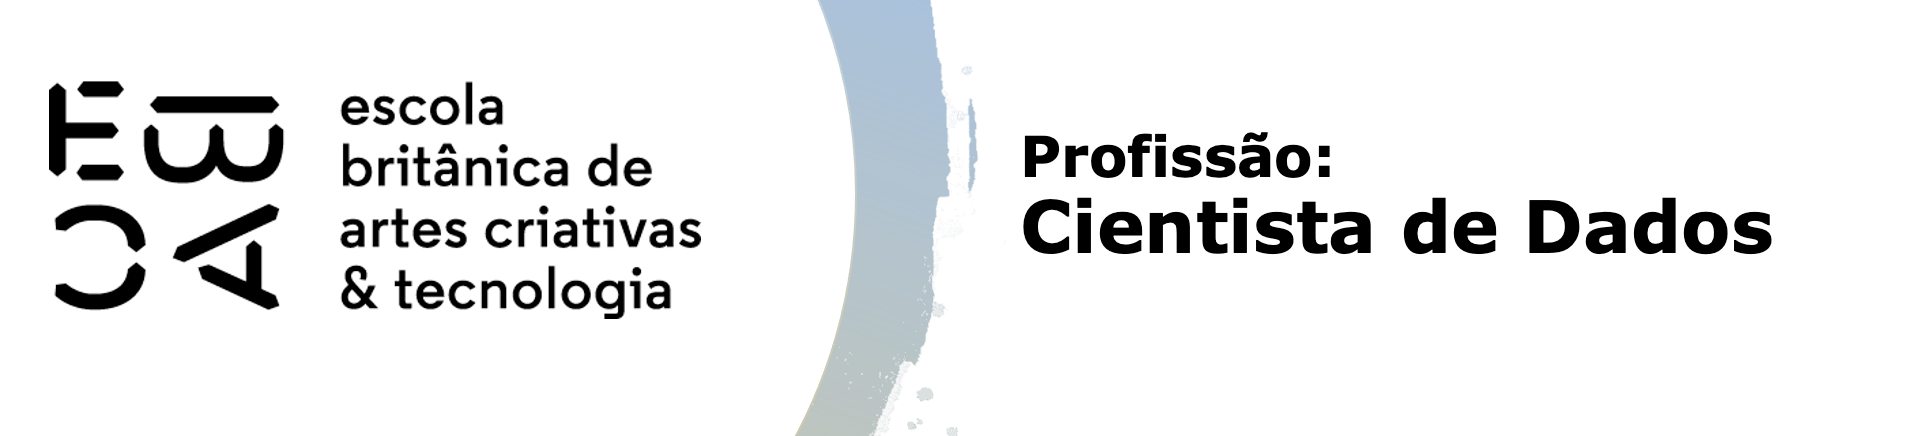

# Tarefa

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

In [48]:
pg = sns.load_dataset('penguins')
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [50]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

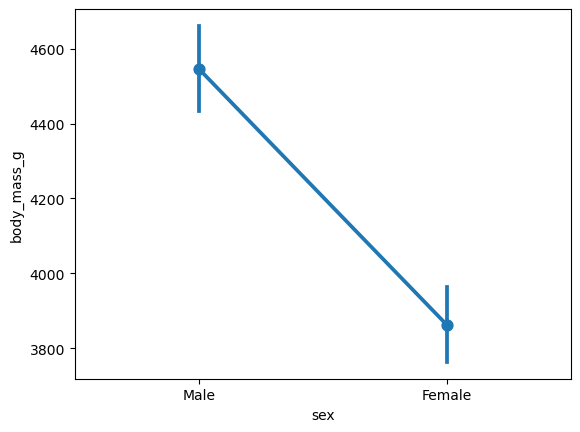

In [52]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [55]:
df = pg[['sex', 'body_mass_g']].dropna()

machos = df[df['sex'] == 'Male']['body_mass_g']
femeas = df[df['sex'] == 'Female']['body_mass_g']

In [77]:
med_machos = np.mean(machos)
med_femeas = np.mean(femeas)

var_machos = np.var(machos, ddof=1)
var_femeas = np.var(femeas, ddof=1)

n_machos = len(machos)
n_femeas = len(femeas)

num = med_machos - med_femeas
den = math.sqrt((var_machos / n_machos) + (var_femeas / n_femeas))
t = num / den

g = ((var_machos / n_machos + var_femeas / n_femeas) ** 2) / \
     (((var_machos / n_machos) ** 2) / (n_machos - 1) + ((var_femeas / n_femeas) ** 2) / (n_femeas - 1))

p_value = 2 * (1 - stats.t.cdf(abs(t), df=g))

print(f'pvalue = {p_value}')

sig = 0.05

if p_value < sig:
    print("Rejeitamos a hipótese nula: Existe uma diferença significativa entre os pesos de machos e fêmeas.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre os pesos de machos e fêmeas.")

pvalue = 4.440892098500626e-16
Rejeitamos a hipótese nula: Existe uma diferença significativa entre os pesos de machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

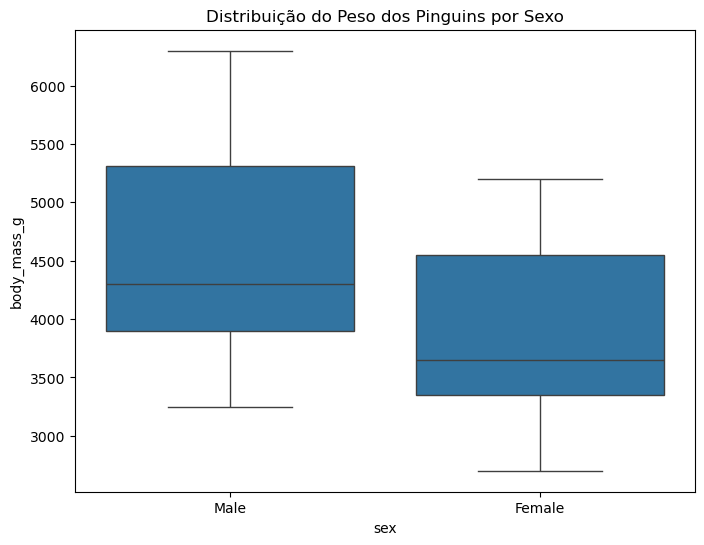

In [60]:
plt.figure(figsize=(8,6))
sns.boxplot(x='sex', y='body_mass_g', data=df)
plt.title("Distribuição do Peso dos Pinguins por Sexo")
plt.show()

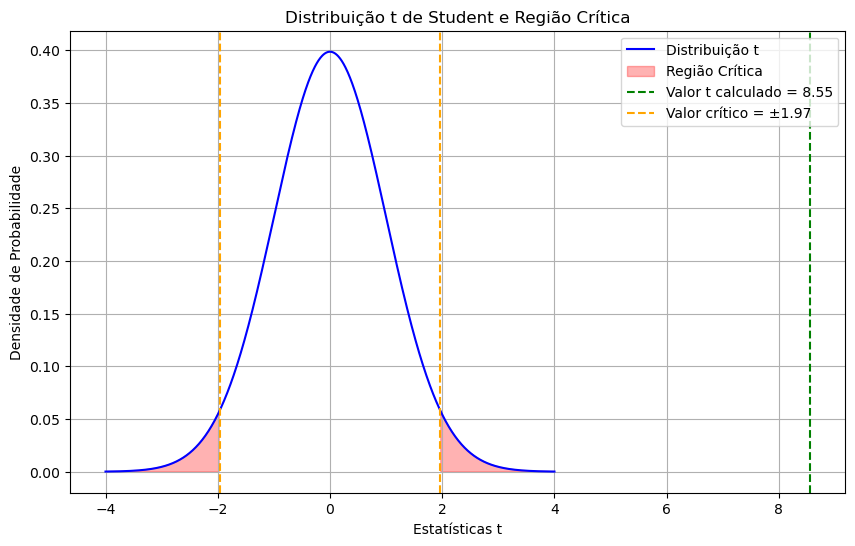

In [62]:
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=g)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribuição t", color='blue')

critical_value = stats.t.ppf(1 - sig / 2, df=g)
plt.fill_between(x, y, where=(x >= critical_value) | (x <= -critical_value), color='red', alpha=0.3, label="Região Crítica")

plt.axvline(t, color='green', linestyle='--', label=f'Valor t calculado = {t:.2f}')

plt.axvline(critical_value, color='orange', linestyle='--', label=f'Valor crítico = ±{critical_value:.2f}')
plt.axvline(-critical_value, color='orange', linestyle='--')

plt.title("Distribuição t de Student e Região Crítica")
plt.xlabel("Estatísticas t")
plt.ylabel("Densidade de Probabilidade")
plt.legend()

plt.grid(True)
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [73]:
df_species = pg[['species', 'sex', 'body_mass_g']].dropna()

df_species

,species,sex,body_mass_g
0,Adelie,Male,3750.0
1,Adelie,Female,3800.0
2,Adelie,Female,3250.0
4,Adelie,Female,3450.0
5,Adelie,Male,3650.0
...,...,...,...
338,Gentoo,Female,4925.0
340,Gentoo,Female,4850.0
341,Gentoo,Male,5750.0
342,Gentoo,Female,5200.0


In [71]:
df_adelie = df_species[df_species['species'] == 'Adelie']
df_gentoo = df_species[df_species['species'] == 'Gentoo']
df_chinstrap = df_species[df_species['species'] == 'Chinstrap']

In [75]:
a_machos = df_adelie[df_adelie['sex'] == 'Male']['body_mass_g']
a_femeas = df_adelie[df_adelie['sex'] == 'Female']['body_mass_g']

med_machos = np.mean(a_machos)
med_femeas = np.mean(a_femeas)

var_machos = np.var(a_machos, ddof=1)
var_femeas = np.var(a_femeas, ddof=1)

n_machos = len(a_machos)
n_femeas = len(a_femeas)

num = med_machos - med_femeas
den = math.sqrt((var_machos / n_machos) + (var_femeas / n_femeas))
t = num / den

g = ((var_machos / n_machos + var_femeas / n_femeas) ** 2) / \
     (((var_machos / n_machos) ** 2) / (n_machos - 1) + ((var_femeas / n_femeas) ** 2) / (n_femeas - 1))

p_value = 2 * (1 - stats.t.cdf(abs(t), df=g))

print(f'pvalue = {p_value:.2}')

sig = 0.05

if p_value < sig:
    print("Rejeitamos a hipótese nula: Existe uma diferença significativa entre os pesos de machos e fêmeas.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre os pesos de machos e fêmeas.")

pvalue = 0.0
Rejeitamos a hipótese nula: Existe uma diferença significativa entre os pesos de machos e fêmeas.


In [79]:
g_machos = df_gentoo[df_gentoo['sex'] == 'Male']['body_mass_g']
g_femeas = df_gentoo[df_gentoo['sex'] == 'Female']['body_mass_g']

med_machos = np.mean(g_machos)
med_femeas = np.mean(g_femeas)

var_machos = np.var(g_machos, ddof=1)
var_femeas = np.var(g_femeas, ddof=1)

n_machos = len(g_machos)
n_femeas = len(g_femeas)

num = med_machos - med_femeas
den = math.sqrt((var_machos / n_machos) + (var_femeas / n_femeas))
t = num / den

g = ((var_machos / n_machos + var_femeas / n_femeas) ** 2) / \
     (((var_machos / n_machos) ** 2) / (n_machos - 1) + ((var_femeas / n_femeas) ** 2) / (n_femeas - 1))

p_value = 2 * (1 - stats.t.cdf(abs(t), df=g))

print(f'pvalue = {p_value:.2}')

sig = 0.05

if p_value < sig:
    print("Rejeitamos a hipótese nula: Existe uma diferença significativa entre os pesos de machos e fêmeas.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre os pesos de machos e fêmeas.")

pvalue = 0.0
Rejeitamos a hipótese nula: Existe uma diferença significativa entre os pesos de machos e fêmeas.


In [81]:
c_machos = df_chinstrap[df_chinstrap['sex'] == 'Male']['body_mass_g']
c_femeas = df_chinstrap[df_chinstrap['sex'] == 'Female']['body_mass_g']

med_machos = np.mean(c_machos)
med_femeas = np.mean(c_femeas)

var_machos = np.var(c_machos, ddof=1)
var_femeas = np.var(c_femeas, ddof=1)

n_machos = len(c_machos)
n_femeas = len(c_femeas)

num = med_machos - med_femeas
den = math.sqrt((var_machos / n_machos) + (var_femeas / n_femeas))
t = num / den

g = ((var_machos / n_machos + var_femeas / n_femeas) ** 2) / \
     (((var_machos / n_machos) ** 2) / (n_machos - 1) + ((var_femeas / n_femeas) ** 2) / (n_femeas - 1))

p_value = 2 * (1 - stats.t.cdf(abs(t), df=g))

print(f'pvalue = {p_value:.2}')

sig = 0.05

if p_value < sig:
    print("Rejeitamos a hipótese nula: Existe uma diferença significativa entre os pesos de machos e fêmeas.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre os pesos de machos e fêmeas.")

pvalue = 2.3e-06
Rejeitamos a hipótese nula: Existe uma diferença significativa entre os pesos de machos e fêmeas.
